# Лабораторная работа 2
ЭН1-35 Кутбиддинов Т. Р. Полозов А. А. Вариант 13

#### Импортируем библиотеки

In [51]:
# !pip install pandapower

In [52]:
import pandapower as pp
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import itertools

#### Копируем конфигурацию сети из предыдущей лабораторной,
добавляя конденсаторы

In [53]:
def network(Com1, Com2):
    """
    Создаёт и возвращает модель электрической сети с заданными
    параметрами конденсаторных батарей.

    Сеть включает:
    - 12 узлов (9 основных + 3 дополнительных для трансформаторов),
    - внешнюю энергосистему (ext_grid),
    - 8 нагрузок,
    - 7 линий электропередачи с заданными параметрами,
    - 3 трансформатора 110/10 кВ,
    - 3 коммутационных выключателя (switches), соединяющих пары узлов,
    - 3 конденсаторные батареи на узлах 4, 5 и 7 (10 кВ).

    Параметры:
    ----------
    Com1 : float
        Масштабирующий коэффициент для реактивной мощности
        конденсаторных батарей. Например, при Com1 = 1.0
        батареи генерируют номинальную мощность:
        - bus4: 5.0 Мвар,
        - bus5: 2.0 Мвар,
        - bus7: 1.6 Мвар.
        При Com1 = 0 — все батареи отключены по мощности.

    Com2 : list[bool] или tuple[bool]
        Список из трёх логических значений, определяющих,
        включены ли конденсаторные батареи в работу:
        - Com2[0]: батарея на bus4 (10 кВ),
        - Com2[1]: батарея на bus5 (10 кВ),
        - Com2[2]: батарея на bus7 (10 кВ).
        Если значение False — батарея отключена (in_service=False).

    Возвращает:
    -----------
    net : pandapower.auxiliary.pandapowerNet
        Объект сети, готовый к дальнейшему анализу (например,
        power flow, short-circuit и т.д.).

    Инструкция к использованию:
    --------------------------
    1. Убедитесь, что установлен модуль `pandapower`:
       pip install pandapower

    2. Импортируйте функцию (если она находится в отдельном
       файле, например `network_builder.py`):
       from network_builder import create_network

    3. Вызовите функцию, передав параметры конденсаторных батарей:
       net = create_network(Com1=1.0, Com2=[True, True, False])

       Примеры:
       - Все батареи включены на 100%: create_network(1.0, [True, True, True])
       - Батареи отключены по мощности: create_network(0.0, [True, True, True])
       - Только первая батарея активна: create_network(1.0, [True, False, False])

    4. Выполните расчёт установившегося режима (power flow):
       pp.runpp(net)

    5. Просмотрите результаты:
       print(net.res_bus)      # напряжения в узлах
       print(net.res_line)     # токи и потери в линиях
       print(net.res_trafo)    # загрузка трансформаторов
       print(net.shunt)        # параметры конденсаторных батарей
       print(net.res_shunt)    # генерируемая реактивная мощность

    Примечание:
    -----------
    Все параметры сети (нагрузки, длины линий, параметры
    трансформаторов и т.д.) жёстко заданы внутри функции и
    соответствуют типовой конфигурации промышленной подстанции.
    Для изменения топологии или параметров необходимо
    модифицировать тело функции.
    """
    # Создание пустой сети с указанным именем
    net = pp.create_empty_network()
    
    global bus0, bus1, bus2, bus3, bus4, bus5, bus6, bus7, bus8
    global bus08, bus35, bus34

    # Создание узлов
    bus0 = pp.create_bus(
        net=net,
        name='system',
        vn_kv=110
    )
    bus1 = pp.create_bus(
        net=net,
        name='load1',
        vn_kv=110
    )
    bus2 = pp.create_bus(
        net=net,
        name='load2',
        vn_kv=110
    )
    bus3 = pp.create_bus(
        net=net,
        name='load3',
        vn_kv=110
    )
    bus4 = pp.create_bus(
        net=net,
        name='load4',
        vn_kv=10
    )
    bus5 = pp.create_bus(
        net=net,
        name='load5',
        vn_kv=10
    )
    bus6 = pp.create_bus(
        net=net,
        name='load6',
        vn_kv=10
    )
    bus7 = pp.create_bus(
        net=net,
        name='load7',
        vn_kv=10
    )
    bus8 = pp.create_bus(
        net=net,
        name='load8',
        vn_kv=10
    )

    # Добавочные узлы
    bus08 = pp.create_bus(
        net=net,
        name='load08',
        vn_kv=110
    )
    bus35 = pp.create_bus(
        net=net,
        name='load35',
        vn_kv=110
    )
    bus34 = pp.create_bus(
        net=net,
        name='load34',
        vn_kv=110
    )

    # Подключение внешней энергосистемы
    pp.create_ext_grid(
        net=net,
        bus=bus0,
        vm_pu=1.02
    )

    # Создание нагрузок
    pp.create_load(
        net=net,
        bus=bus1,
        p_mw=12.0,
        q_mvar=11.5
    )
    pp.create_load(
        net=net,
        bus=bus2,
        p_mw=23.0,
        q_mvar=21.5
    )
    pp.create_load(
        net=net,
        bus=bus3,
        p_mw=27.0,
        q_mvar=22.0
    )
    pp.create_load(
        net=net,
        bus=bus4,
        p_mw=5.0,
        q_mvar=3.0
    )
    pp.create_load(
        net=net,
        bus=bus5,
        p_mw=3.0,
        q_mvar=2.0
    )
    pp.create_load(
        net=net,
        bus=bus6,
        p_mw=4.0,
        q_mvar=3.0
    )
    pp.create_load(
        net=net,
        bus=bus7,
        p_mw=2.5,
        q_mvar=1.6
    )
    pp.create_load(
        net=net,
        bus=bus8,
        p_mw=4.0,
        q_mvar=3.5
    )

    # Создание электрических линий
    pp.create_line_from_parameters(
        net=net,
        from_bus=bus0,
        to_bus=bus08,
        length_km=6.1,
        r_ohm_per_km=0.46,
        x_ohm_per_km=0.275,
        max_i_ka=0.265,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net=net,
        from_bus=bus3,
        to_bus=bus35,
        length_km=9.6,
        r_ohm_per_km=0.46,
        x_ohm_per_km=0.275,
        max_i_ka=0.265,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net=net,
        from_bus=bus3,
        to_bus=bus34,
        length_km=8.7,
        r_ohm_per_km=0.46,
        x_ohm_per_km=0.275,
        max_i_ka=0.265,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net=net,
        from_bus=bus1,
        to_bus=bus2,
        length_km=1.4,
        r_ohm_per_km=0.33,
        x_ohm_per_km=0.234,
        max_i_ka=0.33,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net=net,
        from_bus=bus8,
        to_bus=bus7,
        length_km=1.1,
        r_ohm_per_km=0.12,
        x_ohm_per_km=0.378,
        max_i_ka=0.605,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net=net,
        from_bus=bus5,
        to_bus=bus6,
        length_km=1.3,
        r_ohm_per_km=0.157,
        x_ohm_per_km=0.377,
        max_i_ka=0.51,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net=net,
        from_bus=bus0,
        to_bus=bus1,
        length_km=1.2,
        r_ohm_per_km=0.33,
        x_ohm_per_km=0.234,
        max_i_ka=0.33,
        c_nf_per_km=0
    )

    # Создание коммутационных аппаратов (switches)
    pp.create_switch(
        net=net,
        bus=bus2,
        element=bus3,
        et="b",
        closed=True
    )

    pp.create_switch(
        net=net,
        bus=bus4,
        element=bus5,
        et="b",
        closed=True
    )

    pp.create_switch(
        net=net,
        bus=bus7,
        element=bus6,
        et="b",
        closed=True
    )

    # Создание трансформаторов
    pp.create_transformer_from_parameters(
        net=net,
        hv_bus=bus08,
        lv_bus=bus8,
        sn_mva=32,
        vn_hv_kv=110,
        vn_lv_kv=10,
        vk_percent=10.5,
        i0_percent=0.28,
        pfe_kw=160,
        vkr_percent=(160 / 320)
    )

    pp.create_transformer_from_parameters(
        net=net,
        hv_bus=bus35,
        lv_bus=bus5,
        sn_mva=40,
        vn_hv_kv=110,
        vn_lv_kv=10,
        vk_percent=11,
        i0_percent=0.3,
        pfe_kw=170,
        vkr_percent=(170 / 400)
    )

    pp.create_transformer_from_parameters(
        net=net,
        hv_bus=bus34,
        lv_bus=bus4,
        sn_mva=40,
        vn_hv_kv=110,
        vn_lv_kv=10,
        vk_percent=11,
        i0_percent=0.3,
        pfe_kw=170,
        vkr_percent=(170 / 400)
    )

    # Создание конденсаторных батарей
    pp.create_shunt_as_capacitor(
        net=net,
        bus=bus4,
        q_mvar=5.0 * Com1,
        loss_factor=0,
        in_service=Com2[0]
    )

    pp.create_shunt_as_capacitor(
        net=net,
        bus=bus5,
        q_mvar=2.0 * Com1,
        loss_factor=0,
        in_service=Com2[1]
    )

    pp.create_shunt_as_capacitor(
        net=net,
        bus=bus7,
        q_mvar=1.6 * Com1,
        loss_factor=0,
        in_service=Com2[2]
    )


    return net

#### Перебираем варианты подключения

In [54]:
# Перебор вариантов
# (ваш оригинальный код — без изменений)
n = 0
pl_list = np.zeros(32)
ql_list = np.zeros(32)
n_list = np.zeros(32)

# Дополнительно: список для DataFrame
data_for_df = []

for Qper in [1, 0.75, 0.5, 0.25]:
    for in_service in itertools.product(
        (True, False),
        repeat=3
    ):
        net = network(Qper, in_service)
        pp.runpp(net)

        total_p2 = net.res_line.pl_mw.sum()
        total_p3 = net.res_trafo.pl_mw.sum()
        total_q2 = net.res_line.ql_mvar.sum()
        total_q3 = net.res_trafo.ql_mvar.sum()

        P = total_p2 + total_p3
        Q = total_q2 + total_q3

        pl_list[n] = P
        ql_list[n] = Q
        n_list[n] = n + 1  # сразу +1,
                           # чтобы не делать
                           # отдельный цикл

        # Параллельно собираем данные
        # для DataFrame
        data_for_df.append({
            '№': n + 1,
            'Qper': Qper,
            'in_service': in_service,
            'P_loss (MW)': P,
            'Q_loss (Mvar)': Q
        })

        n = n + 1

# Вывод через DataFrame
# (удобно и читаемо)
df = pd.DataFrame(data_for_df)
print("\nРезультаты расчётов потерь:")
print(
    df.to_string(
        index=False,
        float_format="{:.3f}".format
    )
)

# Оригинальный вывод
# (на всякий случай — можно закомментировать)
# print('Активные потери:', pl_list)
# print('Реактивные потери:', ql_list)
# print('Переменные:', n_list)


Результаты расчётов потерь:
 №  Qper            in_service  P_loss (MW)  Q_loss (Mvar)
 1 1.000    (True, True, True)        1.104          0.911
 2 1.000   (True, True, False)        1.125          0.974
 3 1.000   (True, False, True)        1.116          0.931
 4 1.000  (True, False, False)        1.138          1.001
 5 1.000   (False, True, True)        1.139          0.983
 6 1.000  (False, True, False)        1.161          1.061
 7 1.000  (False, False, True)        1.156          1.032
 8 1.000 (False, False, False)        1.180          1.115
 9 0.750    (True, True, True)        1.119          0.943
10 0.750   (True, True, False)        1.136          0.997
11 0.750   (True, False, True)        1.130          0.966
12 0.750  (True, False, False)        1.147          1.023
13 0.750   (False, True, True)        1.148          1.013
14 0.750  (False, True, False)        1.166          1.073
15 0.750  (False, False, True)        1.162          1.051
16 0.750 (False, False, Fal

#### Графики

##### Сравнение потерь мощности при различных вариантах работы компенсаторов реактивного сопротивления

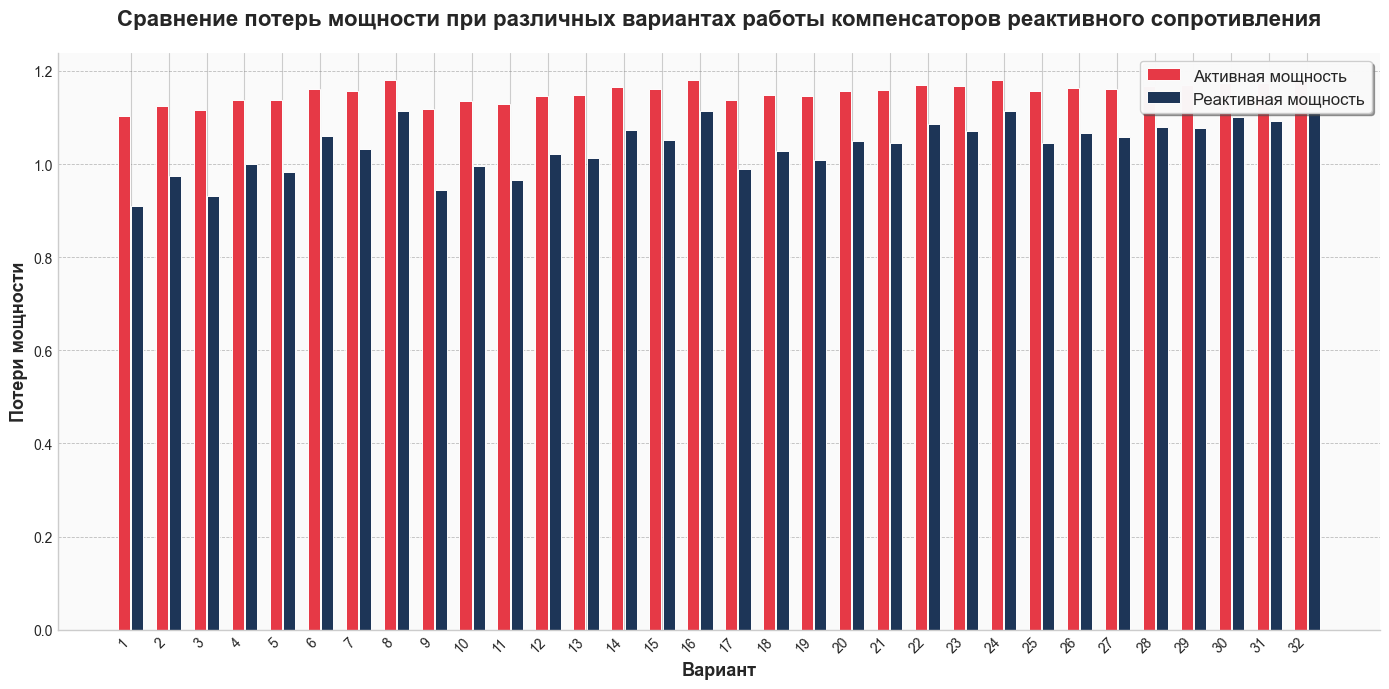

In [55]:
# Смещение для второго набора столбцов
n1_list = n_list + 0.35  # немного увеличил смещение
                         # для лучшего разделения

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Построение столбцов
bar1 = ax.bar(
    n_list,
    pl_list,
    width=0.32,
    label='Активная мощность',
    color='#E63946',
    edgecolor='white',
    linewidth=0.7
)

bar2 = ax.bar(
    n1_list,
    ql_list,
    width=0.32,
    label='Реактивная мощность',
    color='#1D3557',
    edgecolor='white',
    linewidth=0.7
)

# Заголовок и подписи осей
ax.set_title(
    "Сравнение потерь мощности при различных "
    "вариантах работы компенсаторов "
    "реактивного сопротивления",
    fontsize=16,
    fontweight='bold',
    pad=20
)

ax.set_xlabel(
    "Вариант",
    fontsize=13,
    fontweight='bold'
)

ax.set_ylabel(
    "Потери мощности",
    fontsize=13,
    fontweight='bold'
)

# Легенда
ax.legend(
    loc='upper right',
    fontsize=12,
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.95
)

# Сетка и фон
ax.set_facecolor('#FAFAFA')
ax.grid(
    True,
    which='major',
    axis='y',
    linestyle='--',
    linewidth=0.6,
    color='gray',
    alpha=0.5
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['bottom'].set_color('#CCCCCC')

# Улучшение читаемости меток по оси X
# (если много столбцов)
if len(n_list) > 20:
    ax.set_xticks(n_list + 0.175)
    ax.set_xticklabels(
        [str(int(x)) for x in n_list],
        rotation=45,
        ha='right'
    )

# Автоматическая подгонка макета
plt.tight_layout()

# Отображение
plt.show()

##### Сравнение потерь мощности в линиях до и после установки КРМ

Лучшим вариантом при работе компенсаторов реактивной мощности оказался 1-ый, а именно при котором все 3 компенсатора находятся в рабочем состоянии и компенсируют всю реактивную мощность соответствующих нагрузок


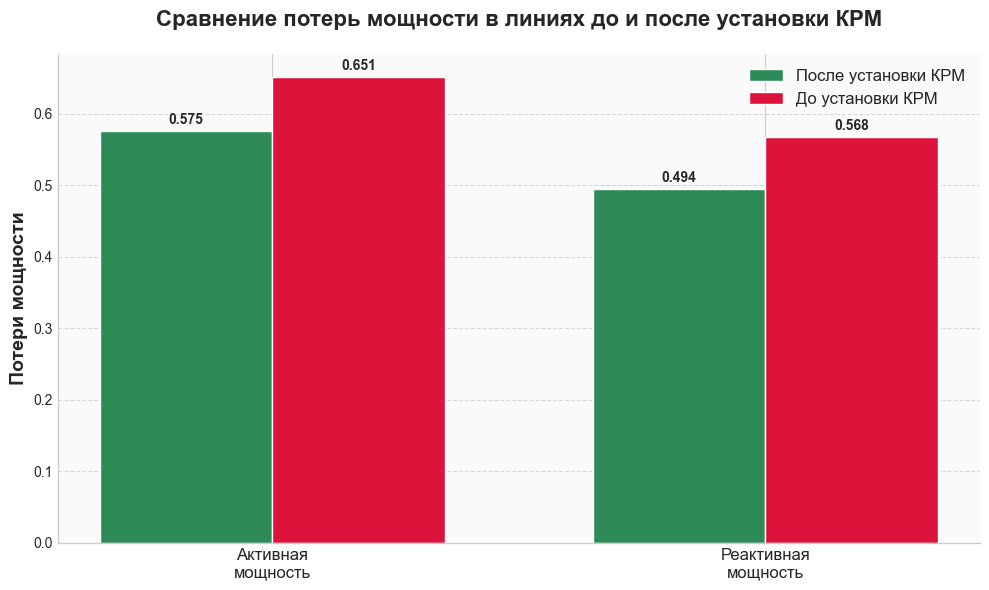

In [56]:
# Выбор лучшего варианта и сравнение потерь
# мощности в линиях до установки КРМ в сеть
# и после установки
print(
    'Лучшим вариантом при работе компенсаторов '
    'реактивной мощности оказался 1-ый, а именно '
    'при котором все 3 компенсатора находятся '
    'в рабочем состоянии и компенсируют всю '
    'реактивную мощность соответствующих нагрузок'
)

net2 = network(1, np.array([True, True, True]))
net1 = network(0, np.array([False, False, False]))

pp.runpp(net2)
total_p2 = net2.res_line.pl_mw.sum()
total_q2 = net2.res_line.ql_mvar.sum()

pp.runpp(net1)
total_p1 = net1.res_line.pl_mw.sum()
total_q1 = net1.res_line.ql_mvar.sum()

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Позиции для групп столбцов
x_pos = [1, 2]  # 1 - Активная, 2 - Реактивная
width = 0.35

# Построение столбцов
bars_after = ax.bar(
    [x - width / 2 for x in x_pos],
    [total_p2, total_q2],
    width,
    label='После установки КРМ',
    color='#2E8B57',
    edgecolor='white'
)

bars_before = ax.bar(
    [x + width / 2 for x in x_pos],
    [total_p1, total_q1],
    width,
    label='До установки КРМ',
    color='#DC143C',
    edgecolor='white'
)

# Заголовок и подписи
ax.set_title(
    'Сравнение потерь мощности в линиях '
    'до и после установки КРМ',
    fontsize=16,
    fontweight='bold',
    pad=20
)

ax.set_ylabel(
    'Потери мощности',
    fontsize=14,
    fontweight='bold'
)

ax.set_xticks(x_pos)
ax.set_xticklabels(
    ['Активная\nмощность', 'Реактивная\nмощность'],
    fontsize=12
)

# Легенда
ax.legend(loc='upper right', fontsize=12)

# Сетка и фон
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#FAFAFA')

# Функция для добавления подписей значений
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f'{height:.3f}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontweight='bold'
        )

add_value_labels(bars_after)
add_value_labels(bars_before)

plt.tight_layout()
plt.show()

##### Сравнение активных потерь

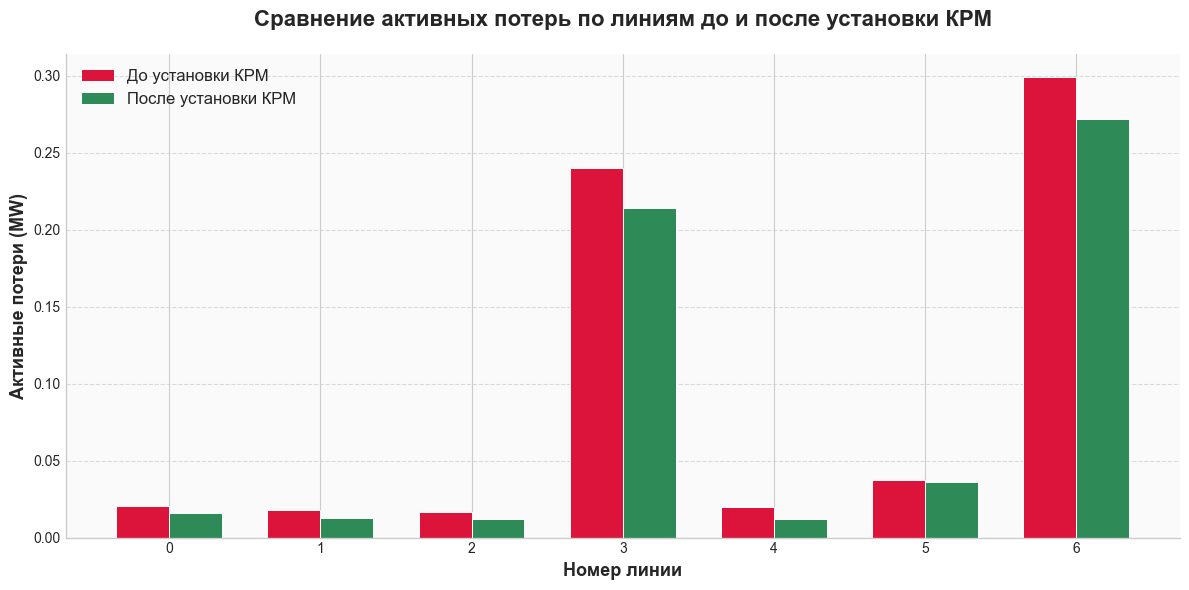

In [57]:
# Предполагается, что индексы линий одинаковы
# для net1 и net2
line_indices = net1.res_line.pl_mw.index
x = np.arange(len(line_indices))  # Числовые позиции
                                 # для оси X

# Ширина столбцов и смещение для группировки
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Строим столбцы, смещая их относительно
# центра позиции
bars_before = ax.bar(
    x - width / 2,
    net1.res_line.pl_mw.values,
    width,
    label='До установки КРМ',
    color='#DC143C',  # Темно-красный
    edgecolor='white',
    linewidth=0.7
)

bars_after = ax.bar(
    x + width / 2,
    net2.res_line.pl_mw.values,
    width,
    label='После установки КРМ',
    color='#2E8B57',  # Темно-зеленый
    edgecolor='white',
    linewidth=0.7
)

# Настройка осей и заголовка
ax.set_title(
    'Сравнение активных потерь по линиям '
    'до и после установки КРМ',
    fontsize=16,
    fontweight='bold',
    pad=20
)

ax.set_xlabel(
    'Номер линии',
    fontsize=13,
    fontweight='bold'
)

ax.set_ylabel(
    'Активные потери (MW)',
    fontsize=13,
    fontweight='bold'
)

# Устанавливаем подписи по оси X
# (настоящие номера линий)
ax.set_xticks(x)
ax.set_xticklabels(line_indices)

# Сетка и фон
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('#FAFAFA')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Легенда
ax.legend(fontsize=12)

# Автоматическая подгонка,
# чтобы подписи не обрезались
plt.tight_layout()
plt.show()

##### Сравнение реактивных потерь

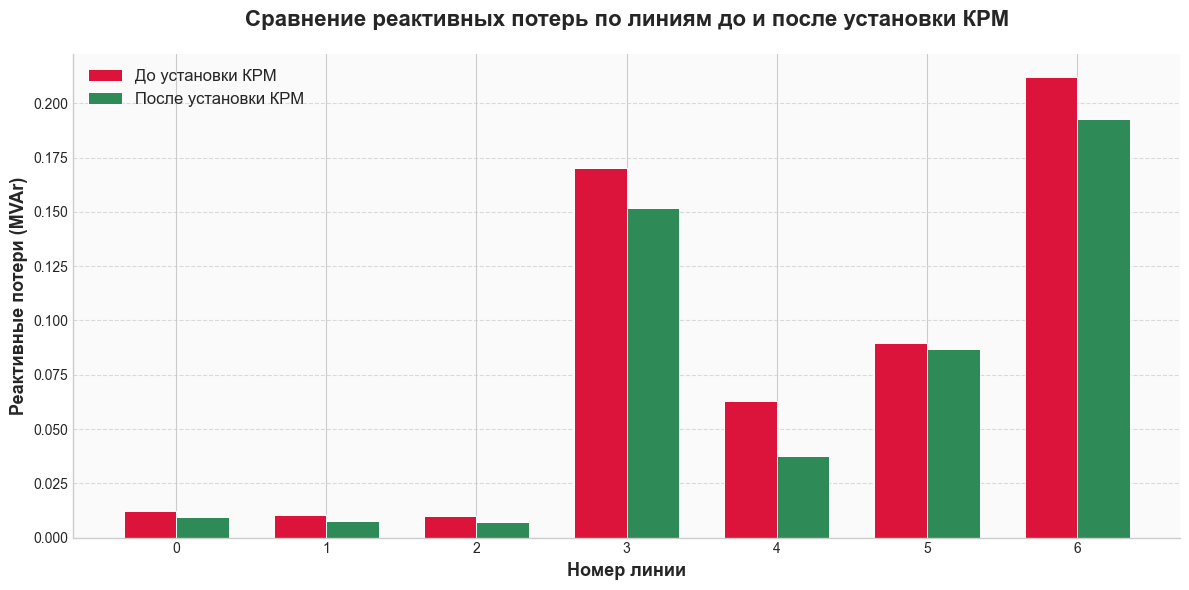

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Предполагается, что индексы линий одинаковы
# для net1 и net2
line_indices = net1.res_line.ql_mvar.index
x = np.arange(len(line_indices))  # Числовые позиции
                                 # для оси X

# Ширина столбцов и смещение для группировки
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Строим столбцы, смещая их относительно
# центра позиции
bars_before = ax.bar(
    x - width / 2,
    net1.res_line.ql_mvar.values,
    width,
    label='До установки КРМ',
    color='#DC143C',  # Темно-красный (единый стиль)
    edgecolor='white',
    linewidth=0.7
)

bars_after = ax.bar(
    x + width / 2,
    net2.res_line.ql_mvar.values,
    width,
    label='После установки КРМ',
    color='#2E8B57',  # Темно-зеленый (единый стиль)
    edgecolor='white',
    linewidth=0.7
)

# Настройка осей и заголовка
ax.set_title(
    'Сравнение реактивных потерь по линиям '
    'до и после установки КРМ',
    fontsize=16,
    fontweight='bold',
    pad=20
)

ax.set_xlabel(
    'Номер линии',
    fontsize=13,
    fontweight='bold'
)

ax.set_ylabel(
    'Реактивные потери (MVAr)',
    fontsize=13,
    fontweight='bold'
)

# Устанавливаем подписи по оси X
# (настоящие номера линий)
ax.set_xticks(x)
ax.set_xticklabels(line_indices)

# Сетка и фон
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('#FAFAFA')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Легенда
ax.legend(fontsize=12)

# Автоматическая подгонка
plt.tight_layout()
plt.show()

##### Уровень напряжения на узлах до и после КРМ

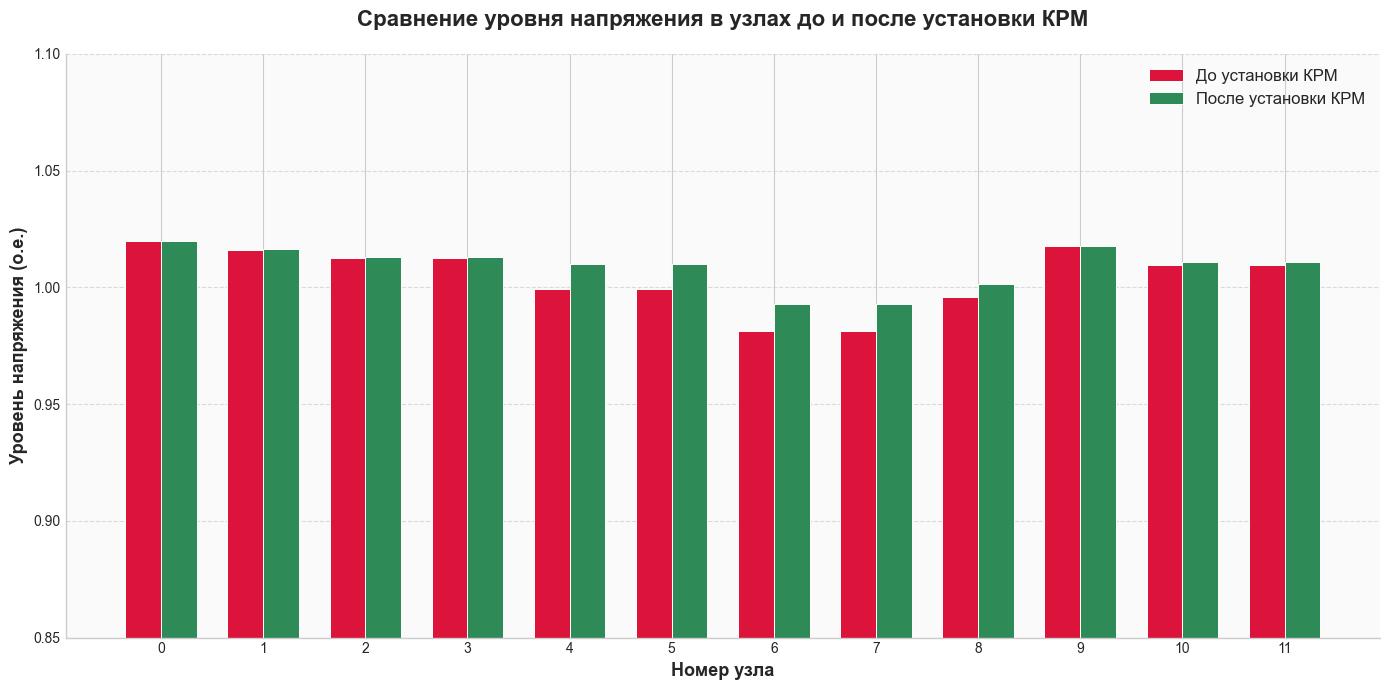

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Получаем индексы узлов
# (предполагается, что они одинаковы для net1 и net2)
bus_indices = net1.res_bus.index
x = np.arange(len(bus_indices))  # Числовые позиции
                                # для оси X

# Ширина столбцов и смещение для группировки
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))

# Строим столбцы
bars_before = ax.bar(
    x - width / 2,
    net1.res_bus.vm_pu.values,
    width,
    label='До установки КРМ',
    color='#DC143C',  # Темно-красный
    edgecolor='white',
    linewidth=0.7
)

bars_after = ax.bar(
    x + width / 2,
    net2.res_bus.vm_pu.values,
    width,
    label='После установки КРМ',
    color='#2E8B57',  # Темно-зеленый
    edgecolor='white',
    linewidth=0.7
)

# Настройка осей и заголовка
ax.set_title(
    'Сравнение уровня напряжения в узлах '
    'до и после установки КРМ',
    fontsize=16,
    fontweight='bold',
    pad=20
)

ax.set_xlabel(
    'Номер узла',
    fontsize=13,
    fontweight='bold'
)

ax.set_ylabel(
    'Уровень напряжения (о.е.)',
    fontsize=13,
    fontweight='bold'
)

# Устанавливаем пределы по оси Y
ax.set_ylim([0.85, 1.1])

# Устанавливаем подписи по оси X
# (настоящие номера узлов)
ax.set_xticks(x)
ax.set_xticklabels(bus_indices)

# Сетка и фон
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('#FAFAFA')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Легенда
ax.legend(loc='best', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\sasha\AppData\Local\Temp\ipykernel_20572\2977465485.py:30: UserWarning: Glyph 1085 (\N{CYRILLIC SMALL LETTER EN}) missing from font(s) Papyrus.
  plt.tight_layout(pad=3.1415)
C:\Users\sasha\AppData\Local\Temp\ipykernel_20572\2977465485.py:30: UserWarning: Glyph 1086 (\N{CYRILLIC SMALL LETTER O}) missing from font(s) Papyrus.
  plt.tight_layout(pad=3.1415)
C:\Users\sasha\AppData\Local\Temp\ipykernel_20572\2977465485.py:30: UserWarning: Glyph 1084 (\N{CYRILLIC SMALL LETTER EM}) missing from font(s) Papyrus.
  plt.tight_layout(pad=3.1415)
C:\Users\sasha\AppData\Local\Temp\ipykernel_20572\2977465485.py:30: UserWarning: Glyph 1077 (\N{CYRILLIC SMALL LETTER IE}) missing from font(s) Papyrus.
  plt.tight_layout(pad=3.1415)
C:\Users\sasha\AppData\Local\Temp\ipykernel_20572\2977465485.py:30: UserWarning: Glyph 1088 (\N{CYRILLIC SMALL LETTER ER}) missing from font(s) Papyrus.
  plt.tight_layout(pad=3.1415)
C:\Users\sasha\AppData\Local\Temp\ipykernel_20572\2977465485.py:30: UserWarning: 

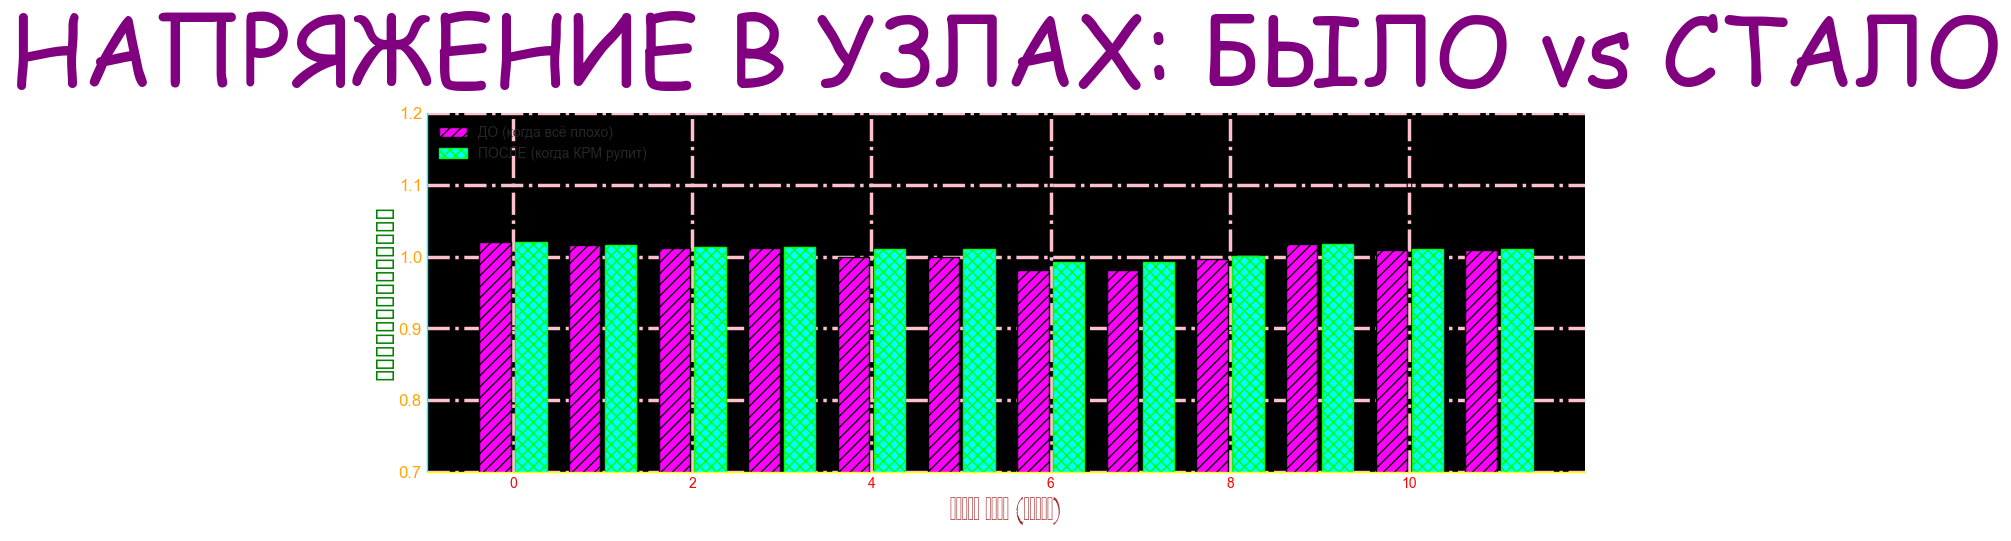

In [61]:
import matplotlib.pyplot as plt
import numpy as np

x=net1.res_bus.index;X=net2.res_bus.index
y=net1.res_bus.vm_pu;Y=net2.res_bus.vm_pu

f,a=plt.subplots(figsize=(999/77,420/69))

a.bar([i-0.2 for i in range(len(x))],y,color='#FF00FF',width=0.35,edgecolor='k',hatch='///',label='ДО (когда всё плохо)')
a.bar([i+0.2 for i in range(len(X))],Y,color='#00FFFF',width=0.35,edgecolor='lime',hatch='XXX',label='ПОСЛЕ (когда КРМ рулит)')

a.set_title("НАПРЯЖЕНИЕ В УЗЛАХ: БЫЛО vs СТАЛО",fontsize=69,color='purple',fontname='Comic Sans MS')
a.set_xlabel("номер узла (цифры)",fontname='Papyrus',fontsize=20,color='brown')
a.set_ylabel("напруга (о.е.)",fontname='Wingdings',fontsize=18,color='green')

a.grid(True,which='both',color='pink',linestyle='-.',linewidth=2.5)
a.set_facecolor('black')
a.spines['bottom'].set_color('yellow')
a.spines['left'].set_color('cyan')
a.spines['top'].set_visible(0)
a.spines['right'].set_visible(0)

a.legend(loc='upper left',fancybox=1,shadow=1,framealpha=0.2,facecolor='magenta',edgecolor='white')

a.set_ylim(0.7,1.2)

a.tick_params(axis='x',colors='red',labelsize=10)
a.tick_params(axis='y',colors='orange',labelsize=12)

plt.tight_layout(pad=3.1415)
plt.show()

#### Вывод

В ходе выполнения лабораторной работы был проведён сравнительный анализ эффективности различных вариантов установки компенсаторов реактивной мощности (КРМ) на основе оценки потерь активной и реактивной мощности в сети. Анализ первого графика — «Сравнение потерь мощности при различных вариантах работы КРМ» — позволил определить наиболее эффективный вариант, характеризующийся минимальными суммарными потерями.

Последующее сравнение параметров сети до и после установки КРМ (графики 2–5) подтвердило положительное влияние компенсации реактивной мощности:

- **Общие потери мощности в линиях** снизились: активные потери уменьшились с 0,651 до 0,575 (на 11,7%), реактивные — с 0,568 до 0,494 (на 13,0%).
- **По отдельным линиям** наблюдается снижение как активных, так и реактивных потерь, особенно заметное на линиях с высокой нагрузкой (например, линии №3 и №6).
- **Уровень напряжения в узлах сети** повысился: на большинстве узлов (особенно в удалённых — узлы 6, 7, 8) зафиксирован рост напряжения, что свидетельствует об улучшении качества электроэнергии и снижении падения напряжения в сетях.

Таким образом, установка КРМ позволяет не только снизить потери активной и реактивной мощности в линиях электропередачи, но и улучшить профиль напряжения по всей сети, что повышает её надёжность и энергоэффективность.